In [1]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/pinocchio_analysis_unbinned_SSC/')
import _analysis_mock_samples as analysis
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import plot_function as plotssc
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit, sys
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]
import matplotlib as mpl

/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [3]:
 d = '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC_paper/'

In [4]:
cat = 400

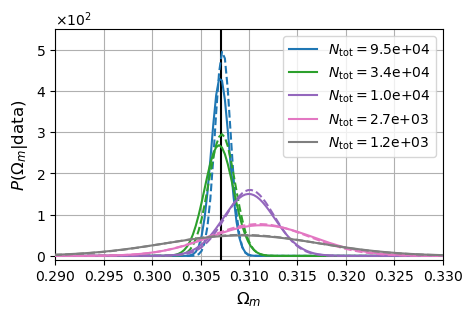

In [5]:
plt.figure(figsize=(5,3),)
name_sample11_20 = ['S' + str(i+1) for i in range(10,20)]
file_hybrid11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample11_20]
N11_20 = np.array(analysis.which_sample(case='paper')['N_CLUSTERS'])[np.arange(8, 18)]
color = ['C'+str(i) for i in range(10)]
for i in [0, 2, 4, 6, 7]:
    res = plotssc.likelihood_load(file = file_hybrid11_20[i])
    plt.plot(res['Om'],res['PSN'],'--',   color=color[i],zorder=1000, )
    plt.plot(res['Om'],res['PSNSSC'], '-',   color=color[i],zorder=1000, label = r'$N_{\rm tot}=$'+f'{N11_20[i]:.1e}')
plt.xlim(0.29, 0.33)
plt.vlines(0.30711, -10, 1000, color = 'k')
plt.xlabel(r'$\Omega_m$', fontsize=12)
plt.ylabel(r'$P(\Omega_m$|data$)$', fontsize=12)
plt.grid(which='both')
plt.legend(loc = 'upper right', fontsize=10)
plt.ylim(-10, 550)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.savefig('Om_posterior.png', bbox_inches='tight', dpi=300)

In [6]:
#fig, ax = plt.subplots(2,1,figsize=(5,3), sharex=True)
#name_sample1_10 = ['S' + str(i+1) for i in range(10)]
#file_hybrid1_10 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample1_10]
#N1_10 = np.array(analysis.analysis(case='paper')['N_CLUSTERS'])[np.arange(8)]

#ax[0].hlines(0.30711, 100, 1000000, zorder=0, color = 'k', lw=1)
#ax[1].hlines(0.30711, 100, 1000000, zorder=0, color = 'k', lw=1)
#for i in range(8):
#    res = plotssc.likelihood_load(file = file_hybrid1_10[i])
#    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#    err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
#    mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#    err_Om_SSC = np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5
#    ax[0].errorbar(N1_10[i],mean_Om_SSC, err_Om_SSC, marker = '.',   color='C0',zorder=1000)
    #ax[0].errorbar(N1_10[i],mean_Om_SN, err_Om_SN, marker = '.',   color='C2',zorder=1000)



#name_sample11_20 = ['S' + str(i+1) for i in range(10,20)]
#file_hybrid11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample11_20]
#N11_20 = np.array(analysis.analysis(case='paper')['N_CLUSTERS'])[np.arange(8, 18)]
#for i in range(10):
#    res = plotssc.likelihood_load(file = file_hybrid11_20[i])
#    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#    err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
#    mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#    err_Om_SSC = np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5
#    ax[1].errorbar(N11_20[i],mean_Om_SSC,err_Om_SSC,marker = '.',  color='C0',)

#@ax[0].errorbar([], [],marker = '.', color='C0', label = 'increasing redshift range')
#ax[1].errorbar([], [],marker = '.', color='C0', label = 'increasing mass range')
#ax[1].set_xlabel('total number of clusters N', fontsize=12)
#ax[0].set_ylabel(r'$\Omega_m\pm \sigma(\Omega_m)$', fontsize=12)
#ax[1].set_ylabel(r'$\Omega_m\pm \sigma(\Omega_m)$', fontsize=12)
#ax[0].grid(which='both')
#ax[1].grid(which='both')
#ax[0].set_xlim(100, 200000)
#ax[0].set_xscale('log')
#ax[0].legend(loc = 'upper left', fontsize=10)
#ax[1].legend(loc = 'lower right', fontsize=10)
#plt.savefig('cosmo_Om_fit.png', bbox_inches='tight', dpi=300)

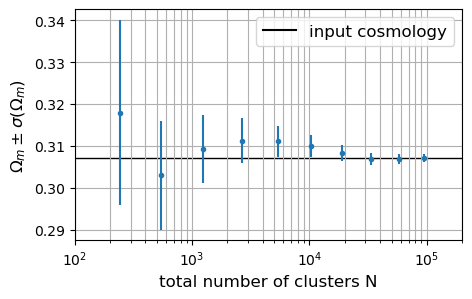

In [7]:
plt.figure(figsize=(5,3), )

plt.hlines(0.30711, 100, 1000000, zorder=0, color = 'k', lw=1)

name_sample11_20 = ['S' + str(i+1) for i in range(10,20)]
file_hybrid11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample11_20]
N11_20 = np.array(analysis.which_sample(case='paper')['N_CLUSTERS'])[np.arange(8, 18)]
for i in range(10):
    res = plotssc.likelihood_load(file = file_hybrid11_20[i])
    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
    err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
    mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
    err_Om_SSC = np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5
    plt.errorbar(N11_20[i],mean_Om_SSC,err_Om_SSC,marker = '.',  color='C0',)

#plt.errorbar([], [],marker = '.', color='C0', label = 'increasing redshift range')
#plt.errorbar([], [],marker = '.', color='C0', label = 'increasing mass range')
plt.plot([], [], '-k', label = 'input cosmology')
plt.xlabel('total number of clusters N', fontsize=12)
plt.ylabel(r'$\Omega_m\pm \sigma(\Omega_m)$', fontsize=12)
plt.grid(which='both')
plt.xlim(100, 200000)
plt.xscale('log')
plt.legend(loc = 'upper right', fontsize=12)
#plt.savefig('cosmo_Om_fit.png', bbox_inches='tight', dpi=300)

[95326 57554 33635 19060 10396  5420  2676  1237   544   241]


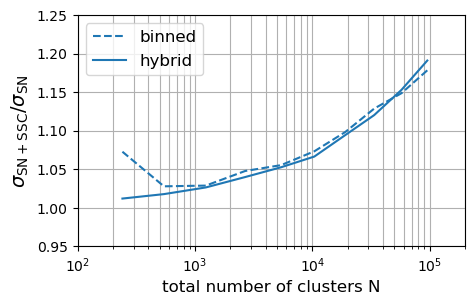

In [8]:
plt.figure(figsize=(5,3))
# name_sample1_10 = ['S' + str(i+1) for i in range(10)]
# file_hybrid1_10 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample1_10]
# N1_10 = np.array(analysis.N)[np.arange(8)]
# err_Om_SSC_unbinned = []
# err_Om_SN_unbinned = []
# err_Om_SSC_binned = []
# err_Om_SN_binned = []
# for i in range(8):
#     res = plotssc.likelihood_load(file = file_hybrid1_10[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)
# plt.plot(N1_10,np.array(err_Om_SSC_unbinned)/np.array(err_Om_SN_unbinned), color = 'C0')

# file_binned1_10 = [d+'{}_cat={}_sample_{}.pkl'.format('binned_gaussian', cat, s) for s in name_sample1_10]
# for i in range(8):
#     res = plotssc.likelihood_load(file = file_binned1_10[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)
# plt.plot(N1_10,np.array(err_Om_SSC_binned)/np.array(err_Om_SN_binned), ls='--', color = 'C0')


name_sample11_20 = ['S' + str(i+1) for i in range(10,20)]
N11_20 = np.array(analysis.which_sample(case='paper')['N_CLUSTERS'])[np.arange(8, 18)]
print(N11_20)
file_hybrid11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample11_20]
err_Om_SSC_unbinned = []
err_Om_SN_unbinned = []
err_Om_SSC_binned = []
err_Om_SN_binned = []
for i in range(10):
    res = plotssc.likelihood_load(file = file_hybrid11_20[i])
    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
    err_Om_SN_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
    mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
    err_Om_SSC_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)
plt.plot(N11_20,np.array(err_Om_SSC_unbinned)/np.array(err_Om_SN_unbinned), color = 'C0')

file_binned11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('binned_gaussian', cat, s) for s in name_sample11_20]
for i in range(10):
    res = plotssc.likelihood_load(file = file_binned11_20[i])
    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
    err_Om_SN_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
    mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
    err_Om_SSC_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)
plt.plot(N11_20,np.array(err_Om_SSC_binned)/np.array(err_Om_SN_binned), ls='--', color = 'C0')

#plt.plot([], [],color='C0', label = 'increasing redshift range')
plt.plot([], [],'--C0', label='binned')
plt.plot([], [],'-C0', label='hybrid')
plt.xlabel('total number of clusters N', fontsize=12)
plt.ylabel(r'$\sigma_{\rm SN+SSC}/\sigma_{\rm SN}$', fontsize=14)
plt.grid(which='both')
plt.ylim(0.95, 1.25)
plt.xlim(100, 200000)
plt.xscale('log')
plt.legend(loc = 'upper left', fontsize=12)
plt.savefig('err_ratio.png', bbox_inches='tight', dpi=300)

[95326 57554 33635 19060 10396  5420  2676  1237   544   241]


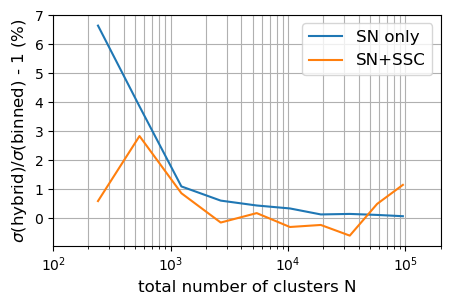

In [22]:
plt.figure(figsize=(5,3))
# name_sample1_10 = ['S' + str(i+1) for i in range(10)]
# file_hybrid1_10 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample1_10]
# N1_10 = np.array(analysis.N)[np.arange(8)]
# err_Om_SSC_unbinned = []
# err_Om_SN_unbinned = []
# err_Om_SSC_binned = []
# err_Om_SN_binned = []
# for i in range(8):
#     res = plotssc.likelihood_load(file = file_hybrid1_10[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)
# plt.plot(N1_10,np.array(err_Om_SSC_unbinned)/np.array(err_Om_SN_unbinned), color = 'C0')

# file_binned1_10 = [d+'{}_cat={}_sample_{}.pkl'.format('binned_gaussian', cat, s) for s in name_sample1_10]
# for i in range(8):
#     res = plotssc.likelihood_load(file = file_binned1_10[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)
# plt.plot(N1_10,np.array(err_Om_SSC_binned)/np.array(err_Om_SN_binned), ls='--', color = 'C0')


name_sample11_20 = ['S' + str(i+1) for i in range(10,20)]
N11_20 = np.array(analysis.which_sample(case='paper')['N_CLUSTERS'])[np.arange(8, 18)]
print(N11_20)
file_hybrid11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample11_20]
file_binned11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('binned_gaussian', cat, s) for s in name_sample11_20]
err_Om_SSC_unbinned = []
err_Om_SN_unbinned = []
err_Om_SSC_binned = []
err_Om_SN_binned = []
for i in range(10):
    res = plotssc.likelihood_load(file = file_hybrid11_20[i])
    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
    err_Om_SN_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
    mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
    err_Om_SSC_unbinned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)

    res = plotssc.likelihood_load(file = file_binned11_20[i])
    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
    err_Om_SN_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5)
    mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
    err_Om_SSC_binned.append(np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5)
    
#plt.plot(N11_20,np.array(err_Om_SN_unbinned),ls='-', color = 'C0')
#plt.plot(N11_20,np.array(err_Om_SSC_unbinned), ls='--',color = 'C0')
plt.plot(N11_20,(np.array(err_Om_SN_unbinned)/np.array(err_Om_SN_binned)-1)*100, ls='-', color = 'C0')
plt.plot(N11_20,(np.array(err_Om_SSC_unbinned)/np.array(err_Om_SSC_binned)-1)*100, ls='-', color = 'C1')

#plt.plot(N11_20,(np.array(err_Om_SN_unbinned)/np.array(err_Om_SN_binned)-1)*100, ls='-', color = 'C0')
#plt.plot(N11_20,(np.array(err_Om_SSC_unbinned)/np.array(err_Om_SSC_binned)-1)*100, ls='-', color = 'C1')

#plt.plot([], [],color='C0', label = 'increasing redshift range')
plt.plot([], [],'-C0', label='SN only')
plt.plot([], [],'-C1', label='SN+SSC')
plt.xlabel('total number of clusters N', fontsize=12)
plt.ylabel(r'$\sigma$(hybrid)/$\sigma$(binned) - 1 (%)', fontsize=12)
plt.grid(which='both')
#plt.yscale('log')
plt.xlim(100, 200000)
plt.xscale('log')
plt.legend(loc = 'upper right', fontsize=12)
plt.savefig('err_err_ratio.png', bbox_inches='tight', dpi=300)

In [10]:
# plt.figure(figsize=(5,3))
# file_binned1_10 = [d+'{}_cat={}_sample_{}.pkl'.format('binned_gaussian', cat, s) for s in name_sample1_10]
# N1_10 = np.array(analysis.N)[np.arange(8)]
# for i in range(8):
#     res = plotssc.likelihood_load(file = file_binned1_10[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC = np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5
#     plt.errorbar(N1_10[i],err_Om_SSC/err_Om_SN, marker = '.', markersize=10,capsize=5, markerfacecolor='w', color='C0')

# file_binned11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('binned_gaussian', cat, s) for s in name_sample11_20]
# N11_20 = np.array(analysis.N)[np.arange(8, 18)]
# for i in range(10):
#     res = plotssc.likelihood_load(file = file_binned11_20[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC = np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5
#     plt.errorbar(N11_20[i],err_Om_SSC/err_Om_SN,marker = 'x', markersize=10,capsize=5, markerfacecolor='w', color='C1',)

# plt.errorbar([], [],marker = 'x', markersize=10,capsize=5, markerfacecolor='w', color='C1', label = 'increasing mass range')
# plt.errorbar([], [],marker = '.', markersize=10,capsize=5, markerfacecolor='w', color='C0', label = 'increasing redshift range')
# plt.xlabel('N', fontsize=12)
# plt.ylabel(r'$\sigma_{\rm SN+SSC}/\sigma_{\rm SN}$', fontsize=12)
# plt.grid(which='both')
# plt.ylim(0.85, 1.7)
# plt.xlim(100, 200000)
# plt.xscale('log')
# plt.legend(loc = 'upper left', fontsize=8)
# plt.savefig('err_binned.png', bbox_inches='tight', dpi=300)

# plt.figure(figsize=(5,3))
# name_sample1_10 = ['S' + str(i+1) for i in range(10)]
# file_hybrid1_10 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample1_10]
# N1_10 = np.array(analysis.N)[np.arange(8)]
# for i in range(8):
#     res = plotssc.likelihood_load(file = file_hybrid1_10[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC = np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5
#     plt.errorbar(N1_10[i],err_Om_SSC/err_Om_SN, marker = '.', markersize=10,capsize=5, markerfacecolor='w', color='C0')


# name_sample11_20 = ['S' + str(i+1) for i in range(10,20)]
# file_hybrid11_20 = [d+'{}_cat={}_sample_{}.pkl'.format('hybrid_garrell_unbinned_SSC', cat, s) for s in name_sample11_20]
# N11_20 = np.array(analysis.N)[np.arange(8, 18)]
# for i in range(10):
#     res = plotssc.likelihood_load(file = file_hybrid11_20[i])
#     mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])
#     err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
#     mean_Om_SSC = np.trapz(res['PSNSSC']*res['Om'], res['Om'])
#     err_Om_SSC = np.trapz((mean_Om_SN - res['Om'])**2*res['PSNSSC'], res['Om'])**.5
#     plt.errorbar(N11_20[i],err_Om_SSC/err_Om_SN,marker = 'x', markersize=10,capsize=5, markerfacecolor='w', color='C1',)

# plt.errorbar([], [],marker = 'x', markersize=10,capsize=5, markerfacecolor='w', color='C1', label = 'increasing mass range')
# plt.errorbar([], [],marker = '.', markersize=10,capsize=5, markerfacecolor='w', color='C0', label = 'increasing redshift range')
# plt.xlabel('N', fontsize=12)
# plt.ylabel(r'$\sigma_{\rm SN+SSC}/\sigma_{\rm SN}$', fontsize=12)
# plt.grid(which='both')
# plt.ylim(0.85, 1.7)
# plt.xlim(100, 200000)
# plt.xscale('log')
# plt.legend(loc = 'upper left', fontsize=8)